<a href="https://colab.research.google.com/github/OlgaVoronkova/Definition_of_handwritten_digits/blob/main/Definition_of_handwritten_digits_(old).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam, Adadelta # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
from sklearn.model_selection import train_test_split
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive
%matplotlib inline 

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [22]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [23]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)



In [24]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [25]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [26]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [27]:
x_train_n, x_val, y_train_n, y_val = train_test_split(x_train, y_train, test_size = 0.2, shuffle=True)
numb_model = Sequential()
numb_model.add(Dense(1000, input_dim = 784, activation='relu'))
numb_model.add(Dropout(0.2))
numb_model.add(BatchNormalization())
numb_model.add(Dense(500, activation="relu"))
numb_model.add(Dropout(0.4))
numb_model.add(BatchNormalization())
numb_model.add(Dense(100, activation="relu"))
numb_model.add(Dropout(0.4))
numb_model.add(BatchNormalization())
numb_model.add(Dense(10, activation="softmax"))
numb_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
numb_model.summary()
numb_model.train_on_batch(x_train, y_train)
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
numb_model.fit(x_train_n, y_train_n, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              785000    
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 batch_normalization_3 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 500)              2000      
 hNormalization)                                      

In [28]:
scores = numb_model.evaluate(x_test, y_test, verbose=1)
print(scores)

313/313 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9825
[0.06160221993923187, 0.9825000166893005]


In [29]:
numb_model.save_weights('numb_model.1')
numb_model.load_weights('numb_model.1')
number_7 = image.load_img("/content/number_7.jpg", target_size=(28, 28), color_mode = 'grayscale')
number_8 = image.load_img("/content/number_8.jpg", target_size=(28, 28), color_mode = 'grayscale')

In [30]:
number = 255 -  image.img_to_array(number_7)
number8 = 255 -  image.img_to_array(number_8)
number_r =number.reshape(1, 784)
number8_r =number8.reshape(1, 784)
number_r = number_r.astype('float32')
number_r = number_r / 255 
number8_r = number8_r.astype('float32')
number8_r = number8_r / 255 
prediction = numb_model.predict(number_r) 
prediction8 = numb_model.predict(number8_r) 
print(prediction)
print(prediction8)
prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(prediction)
prediction8 = np.argmax(prediction8) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(prediction8)

[[3.1980591e-05 4.8043545e-05 1.9594735e-02 9.5545650e-01 2.1154043e-04
  1.6911395e-02 5.2585249e-04 2.2386145e-03 4.3482180e-03 6.3306448e-04]]
[[3.66690685e-03 1.28118023e-01 2.50935438e-03 2.94015974e-01
  1.04378695e-02 8.01945776e-02 1.60961971e-01 1.49714702e-03
  3.18523526e-01 7.46619917e-05]]
3
8


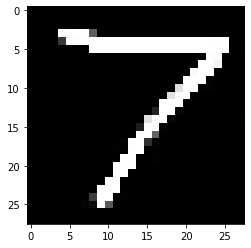

In [31]:
number = number.reshape(1,28, 28)
plt.imshow(Image.fromarray(number[0])) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

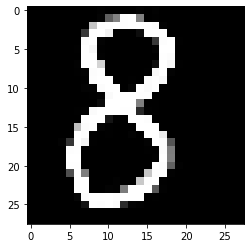

In [32]:
number8 = number8.reshape(1,28, 28)
plt.imshow(Image.fromarray(number8[0])) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()